# Projeto de Ciência de Dados: Previsão de Vendas

* Tarefa: Conseguir prever as vendas de uma empresa, em determinado período, com base nos gastos em anúncios nas 3 grandes redes que a empresa investe: TV, jornal e rádio.

-------------------------------------------------------------------------------------------------------------------------

### Passo a passo:

* Passo 1: Entender o desafio.
    > O que preciso fazer.

* Passo 2: Entender área/empresa:
    > Por que preciso fazer?
    
* Passo 3: Extração/obtenção dos dados/informações.

* Passo 4: Ajuste dos dados (Tratamento/limpeza)

* Passo 5: Análise Exploratória.

* Passo 6: Modelagem + Algoritmos (IA, se necessário)

* Passo 7: Interpretação de resultados.

-------------------------------------------------------------------------------------------------------------------------

In [1]:
# Importação da base de dados

import pandas as pd

tabela = pd.read_csv('advertising.csv')
display(tabela)
#print(tabela.info())

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


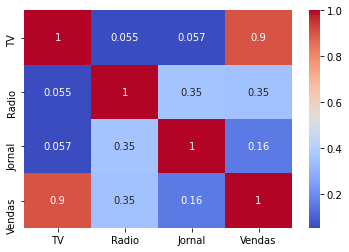

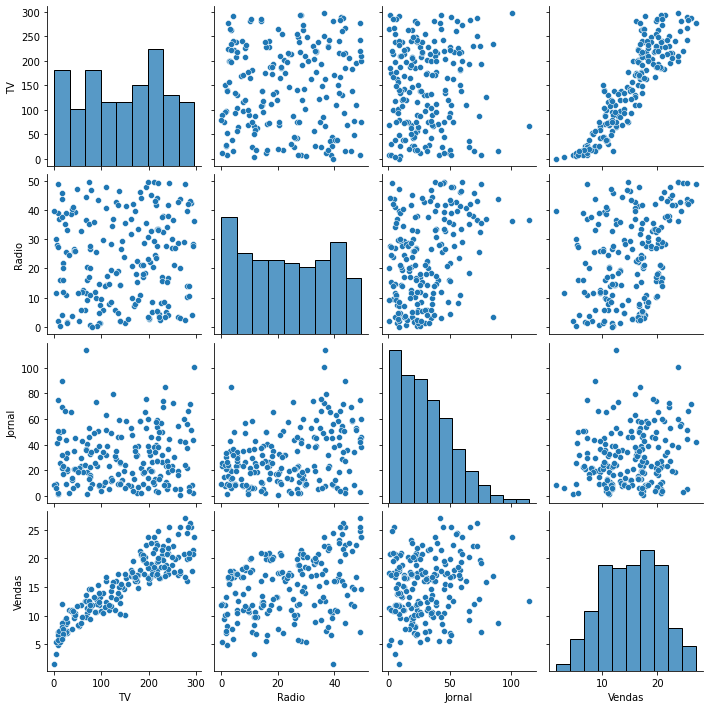

In [2]:
# Apontamentos sobre os dados da tabela:
# 1. Os valores estão em formato numérico e não faltam dados.
# 2. As vendas estão registradas em milhares ou milhões?

# Análise exploratória:
# 1. Correlação entre os itens. (Número entre -1 e 1)

import seaborn as sns
import matplotlib.pyplot as plt

# Observação: Seaborn foi construído utilizando matplotlib. Esse é o motivo da importação das 2 bibliotecas.

sns.heatmap(tabela.corr(), annot=True, cmap='coolwarm') #Annot: adiciona os valores em cada quadrado, cmap: cor
plt.show()

sns.pairplot(tabela)
plt.show()

* A Correlação entre tv-vendas é mais alta, seguida pela correlação entre rádio-vendas e, por último, jornal-vendas.
* Tv, rádio e jornal não têm correlação entre si.

* Quero usar as características "TV", "Rádio" e "Jornal" para prever a quantidade de vendas. Normalmente, não é bom que se tenha uma correlação forte entre as características. Tenho X e quero Y.

## Preparação dos dados para treinamento do modelo de machine learning:

In [3]:
# Separação dos dados de treino e dos dados de teste.

from sklearn.model_selection import train_test_split

y = tabela['Vendas']
x = tabela.drop('Vendas', axis = 1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3, random_state=1)
# A função train_test_split, por padrão, passará os 4 tipos de valores: x (treino), x (teste), y (treino), y (teste)
# Além dos parêmetros x e y, pode-se passar o tamanho da amostra na função train_test_split. Ex.: train_test_split(x, y, test_size=0.3), 
# ou seja, 30% das amostras da base de dados serão de teste. Caso o parâmetro não seja passado, o valor padrão é próximo a 20%
# o parâmetro random_state = 1, caso inserido, cria a divisão de maneira aleatória (sempre o mesmo formato ao rodar, porém de maneira aleatória).


### Escolha dos modelos que serão usados:

> Regressão Linear

> Random Forest (Árvore de decisão)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Criando as inteligências artificiais:
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# Treinando o modelo:
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)



RandomForestRegressor()

### Teste da AI e escolha do melhor modelo:

* Vamos usar o R² : Método que diz, em %, o quanto o nosso modelo consegue explicar o que acontece.

In [5]:
from sklearn import metrics

# Criação das previsões utilizando os 2 modelos diferentes:

previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# Comparando os resultados dos 2 modelos:

print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))


0.9071151423684272
0.9636621356002595


In [ ]:
# Para usar o modelo:

# 1. Criar uma tabela com os novos dados de TV, Radio e Jornal
# 2. Importar e ler a tabela
# 3. Utilizar o melhor modelo:
# 4. modelo_arvoredecisao.predict(tabela_nova)
# 5. display(previsao_arvoredecisao) : Cada valor mostrado será a previsão para uma linha de anúncios